In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from IPython.display import display, clear_output



In [2]:
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open webcam")
    exit()

feature_params = dict(maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)
lk_params = dict(winSize=(15, 15), maxLevel=2,
                 criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

color = np.random.randint(0, 255, (500, 3))

ret, old_frame = cap.read()
if not ret:
    print("Cannot read frame")
    cap.release()
    exit()

old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)

p0 = cv2.goodFeaturesToTrack(old_gray, mask=None, **feature_params)

mask = np.zeros_like(old_frame)

KeyboardInterrupt: 

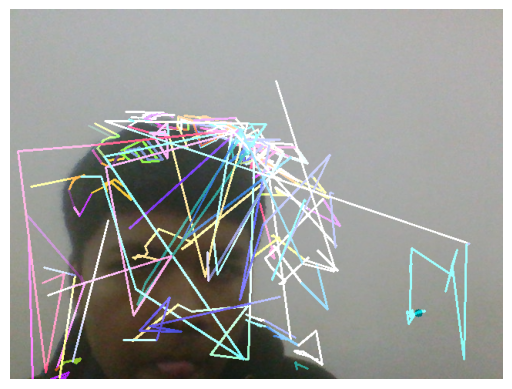

In [17]:


while True:
    ret, frame = cap.read()
    if not ret:
        print("Cannot read frame")
        break

    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    if p0 is not None:
        p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

        if p1 is not None and st is not None:
            good_new = p1[st == 1]
            good_old = p0[st == 1]
    
            for i, (new, old) in enumerate(zip(good_new, good_old)):
                a, b = new.ravel()
                c, d = old.ravel()
                # Convert coordinates to int for OpenCV drawing functions
                a, b, c, d = int(round(a)), int(round(b)), int(round(c)), int(round(d))
                mask = cv2.line(mask, (a, b), (c, d), color[i].tolist(), 2)
                frame = cv2.circle(frame, (a, b), 5, color[i].tolist(), -1)


            img = cv2.add(frame, mask)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
            clear_output(wait=True)
            plt.imshow(img_rgb)
            plt.axis('off')
            display(plt.gcf())
    
            old_gray = frame_gray.copy()
            p0 = good_new.reshape(-1, 1, 2)
        else:
            print("No points to track")
            break

    if cv2.waitKey(30) & 0xFF == 27:
        break

plt.ion()


In [12]:
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open webcam")
    exit()

feature_params = dict(maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)
lk_params = dict(winSize=(15, 15), maxLevel=2,
                 criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

color = np.random.randint(0, 255, (500, 3))

ret, old_frame = cap.read()
if not ret:
    print("Cannot read frame")
    cap.release()
    exit()

old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)

p0 = cv2.goodFeaturesToTrack(old_gray, mask=None, **feature_params)

mask = np.zeros_like(old_frame)

while True:
    ret, frame = cap.read()
    if not ret:
        print("Cannot read frame")
        break

    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    if p0 is not None:
        p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

        if p1 is not None and st is not None:
            good_new = p1[st == 1]
            good_old = p0[st == 1]

            for i, (new, old) in enumerate(zip(good_new, good_old)):
                a, b = new.ravel()
                c, d = old.ravel()
                a, b, c, d = int(round(a)), int(round(b)), int(round(c)), int(round(d))
                mask = cv2.line(mask, (a, b), (c, d), color[i].tolist(), 2)
                frame = cv2.circle(frame, (a, b), 5, color[i].tolist(), -1)

            img = cv2.add(frame, mask)

            cv2.imshow('Optical Flow Tracking', img)

            old_gray = frame_gray.copy()
            p0 = good_new.reshape(-1, 1, 2)
        else:
            print("No points to track")
            break

    if cv2.waitKey(30) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()
# ...existing code...

No points to track


In [6]:
cap.release()
cv2.destroyAllWindows()